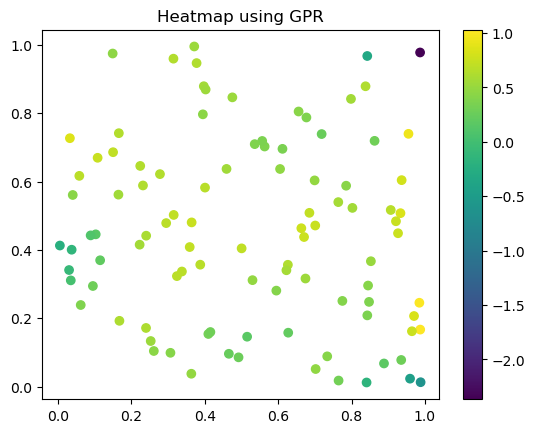

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA

# Beispiel-Funktion zur Erstellung einer Heatmap mit Gaussian Process Regression (GPR)
def create_heatmap_gpr(data):
    gpr = GaussianProcessRegressor()
    gpr.fit(data['coords'], data['values'])
    grid_coords = np.random.rand(100, 2)  # Ersetze dies durch tatsächliche Rasterkoordinaten
    heatmap_values = gpr.predict(grid_coords)
    return grid_coords, heatmap_values

# Beispiel-Datensatz laden (Dummy-Daten)
data = {
    'coords': np.random.rand(100, 2),
    'values': np.random.rand(100)
}

# Heatmap erstellen
grid_coords, heatmap_values = create_heatmap_gpr(data)

# Heatmap visualisieren
plt.scatter(grid_coords[:, 0], grid_coords[:, 1], c=heatmap_values, cmap='viridis')
plt.colorbar()
plt.title('Heatmap using GPR')
plt.show()

# Karte mit Folium anzeigen
m = folium.Map(location=[48.0708, 10.9074], zoom_start=12)
for i, coord in enumerate(grid_coords):
    folium.CircleMarker(
        location=(coord[1], coord[0]),
        radius=5,
        fill=True,
        fill_color='blue',
        color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('../data'):
    os.makedirs('../data')

# Heatmap speichern
m.save('../data/heatmap.html')
m

In [10]:
import os
import numpy as np
import folium
from folium.plugins import HeatMap

# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('data'):
    os.makedirs('data')

# Dummy-Daten für verschiedene Heatmaps
terrain_data = np.random.rand(100, 2) * [1, 1] + [48.0708, 10.9074]  # Geländetopologie
weather_data = np.random.rand(100, 2) * [1, 1] + [48.0708, 10.9074]  # Wetterbedingungen
movement_data = np.random.rand(100, 2) * [1, 1] + [48.0708, 10.9074]  # Einheitenbewegungen

# Karte erstellen
m = folium.Map(location=[48.0708, 10.9074], zoom_start=12)

# Heatmap für Geländetopologie
# HeatMap(terrain_data, name="Terrain Topology", min_opacity=0.2, max_zoom=18).add_to(m)

# Heatmap für Wetterbedingungen
# HeatMap(weather_data, name="Weather Conditions", min_opacity=0.2, max_zoom=18).add_to(m)

# Heatmap für Einheitenbewegungen
HeatMap(movement_data, name="Unit Movements", min_opacity=0.2, max_zoom=18).add_to(m)

# Layer Control hinzufügen
folium.LayerControl().add_to(m)

# Karte speichern
m.save('data/heatmap.html')
m


In [20]:
import numpy as np

# Generiere Dummy-Daten für Einheitenbewegungen
def generate_movement_data(n_points=100, center=[48.0708, 10.9074], spread=0.01):
    return np.random.rand(n_points, 2) * spread + center

movement_data = generate_movement_data()


In [34]:
import requests
import numpy as np

def get_weather_data(api_key='19b7dda8e52495702379cc65fdb0870d', lat=48.0708, lon=10.9074):
    url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&exclude=minutely,hourly,alerts&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data


# Beispiel zur Verwendung der OpenWeatherMap API (Sie benötigen einen API-Schlüssel)
# api_key = "19b7dda8e52495702379cc65fdb0870d"
weather_data = get_weather_data(api_key)

# Überprüfen der API-Antwort
print(weather_data)


{'coord': {'lon': 10.9074, 'lat': 48.0708}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.18, 'feels_like': 18.9, 'temp_min': 18.21, 'temp_max': 21.38, 'pressure': 1015, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1717503287, 'sys': {'type': 2, 'id': 2080269, 'country': 'DE', 'sunrise': 1717471144, 'sunset': 1717528244}, 'timezone': 7200, 'id': 6556262, 'name': 'Penzing', 'cod': 200}


In [38]:
import requests

def get_weather_data(api_key, lat=48.0708, lon=10.9074):
    url = f"http://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude=minutely,hourly,alerts&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data

# Beispiel zur Verwendung der OpenWeatherMap API (Sie benötigen einen API-Schlüssel)
api_key = "19b7dda8e52495702379cc65fdb0870d"
weather_data = get_weather_data(api_key)

# Überprüfen der API-Antwort
print(weather_data)

{'cod': 401, 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}


In [48]:
import os
import numpy as np
import requests
import folium
from folium.plugins import HeatMap

# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('data'):
    os.makedirs('data')

# OpenWeatherMap API-Schlüssel
api_key = "19b7dda8e52495702379cc65fdb0870d"

# Funktion zum Abrufen der Wetterdaten von OpenWeatherMap
def get_weather_data(api_key, lat=48.0708, lon=10.9074):
    url = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude=minutely,hourly,alerts&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()
    return data

# Abrufen der Wetterdaten
weather_data = get_weather_data(api_key)

# Extrahieren der aktuellen Wetterdaten
temperature = weather_data['current']['temp']
precipitation = weather_data['current'].get('rain', {}).get('1h', 0)
lat, lon = weather_data['lat'], weather_data['lon']

# Generieren einer stochastischen Verteilung von Punkten
def generate_weather_points(center, n_points=10000, spread=0.1):
    lat_center, lon_center = center
    lats = np.random.uniform(lat_center - spread, lat_center + spread, n_points)
    lons = np.random.uniform(lon_center - spread, lon_center + spread, n_points)
    return lats, lons

center = [lat, lon]
lats, lons = generate_weather_points(center)

# Generieren von Dummy-Daten basierend auf den aktuellen Wetterdaten
def generate_dummy_data(n_points, base_value, noise_level=2):
    data = base_value + np.random.randn(n_points) * noise_level
    return data

temperature_data = generate_dummy_data(len(lats), base_value=temperature)  # Basiswert für Temperatur: aktuelle Temperatur
precipitation_data = generate_dummy_data(len(lats), base_value=precipitation)  # Basiswert für Niederschlag: aktuelle Niederschlagsmenge

# Karte erstellen
m = folium.Map(location=center, zoom_start=12)

# Heatmap für Temperaturen mit klarer Palette (Blau -> Grün -> Gelb -> Rot)
temperature_heatmap_data = [[lat, lon, temp] for lat, lon, temp in zip(lats, lons, temperature_data)]
HeatMap(temperature_heatmap_data, name="Temperature", min_opacity=0.2, max_zoom=18, gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 1: 'red'}).add_to(m)

# Heatmap für Niederschlag mit klarer Palette (Violett -> Blau -> Türkis -> Weiß)
precipitation_heatmap_data = [[lat, lon, precip] for lat, lon, precip in zip(lats, lons, precipitation_data)]
HeatMap(precipitation_heatmap_data, name="Precipitation", min_opacity=0.2, max_zoom=18, gradient={0.2: 'purple', 0.4: 'blue', 0.6: 'cyan', 1: 'white'}).add_to(m)

# Layer Control hinzufügen
folium.LayerControl().add_to(m)

# Karte speichern
m.save('data/heatmap.html')
m

KeyError: 'current'

In [40]:
import os
import numpy as np
import folium
from folium.plugins import HeatMap

# Sicherstellen, dass das Verzeichnis 'data' existiert
if not os.path.exists('data'):
    os.makedirs('data')


# Karte erstellen
m = folium.Map(location=[48.0708, 10.9074], zoom_start=12)

# Heatmap für Einheitenbewegungen
HeatMap(movement_data, name="Unit Movements", min_opacity=0.2, max_zoom=18).add_to(m)

# Heatmap für Wetterbedingungen
weather_heatmap_data = [[lat, lon, temp] for (lat, lon), temp in zip(weather_coords, weather_temperatures)]
HeatMap(weather_heatmap_data, name="Weather Conditions", min_opacity=0.2, max_zoom=18).add_to(m)

# Layer Control hinzufügen
folium.LayerControl().add_to(m)

# Karte speichern
m.save('data/heatmap.html')
m

